<a href="https://colab.research.google.com/github/anjankumar1432/aaaaannn/blob/main/unsupervised1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sb

In [ ]:
aa=pd.read_csv('/content/samsung.csv')

In [ ]:
aa

,Year,Quarter,Product Model,5G Capability,Units Sold,Revenue ($),Market Share (%),Regional 5G Coverage (%),5G Subscribers (millions),Avg 5G Speed (Mbps),Preference for 5G (%),Region
0,2019,Q1,Galaxy S10,No,26396,4.212951e+06,1.04,57.36,39.55,293.10,55.87,Asia-Pacific
1,2019,Q1,Galaxy Note10,No,25671,7.240266e+06,2.82,85.80,42.58,67.46,37.26,Latin America
2,2019,Q1,Galaxy S20,No,16573,2.560833e+07,-0.03,47.02,3.78,77.25,84.66,Middle East & Africa
3,2019,Q1,Galaxy Note20,No,7177,2.198442e+07,0.84,25.70,23.41,105.27,40.03,North America
4,2019,Q1,Galaxy S21,No,45633,1.634244e+07,2.36,89.13,44.43,206.17,76.88,Latin America
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,Q4,Galaxy S22 5G,Yes,36216,2.995937e+07,3.82,70.59,46.92,177.43,63.86,Latin America
996,2022,Q2,Galaxy S21,No,33806,2.369938e+07,-0.23,77.31,47.51,129.70,78.41,North America
997,2022,Q1,Galaxy S10,No,23678,2.330203e+07,0.58,45.61,43.79,156.56,72.06,Europe
998,2023,Q4,Galaxy Note10,No,35697,1.946256e+07,2.49,36.55,36.44,236.39,47.11,North America


In [ ]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1000 non-null   int64  
 1   Quarter                    1000 non-null   object 
 2   Product Model              1000 non-null   object 
 3   5G Capability              1000 non-null   object 
 4   Units Sold                 1000 non-null   int64  
 5   Revenue ($)                1000 non-null   float64
 6   Market Share (%)           1000 non-null   float64
 7   Regional 5G Coverage (%)   1000 non-null   float64
 8   5G Subscribers (millions)  1000 non-null   float64
 9   Avg 5G Speed (Mbps)        1000 non-null   float64
 10  Preference for 5G (%)      1000 non-null   float64
 11  Region                     1000 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 93.9+ KB


In [ ]:
aa.drop(['Year','Quarter','Product Model','5G Capability','Units Sold','Regional 5G Coverage (%)','5G Subscribers (millions)','Avg 5G Speed (Mbps)','Preference for 5G (%)','Region'],axis=1, inplace=True,errors='ignore')

In [ ]:
aa

,Revenue ($),Market Share (%)
0,4.212951e+06,1.04
1,7.240266e+06,2.82
2,2.560833e+07,-0.03
3,2.198442e+07,0.84
4,1.634244e+07,2.36
...,...,...
995,2.995937e+07,3.82
996,2.369938e+07,-0.23
997,2.330203e+07,0.58
998,1.946256e+07,2.49


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range(1,11):
  Kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
  Kmeans.fit(aa)
  wcss.append(Kmeans.inertia_)

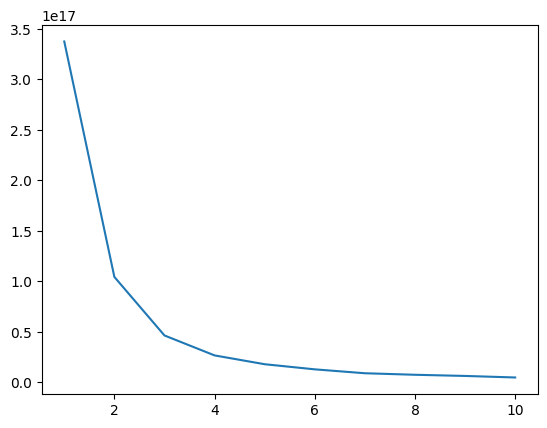

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)

In [ ]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=42)
kmeans.fit(aa)

KMeans(n_clusters=5, random_state=42)

In [ ]:
labels=kmeans.labels_
aa['cluster']=labels

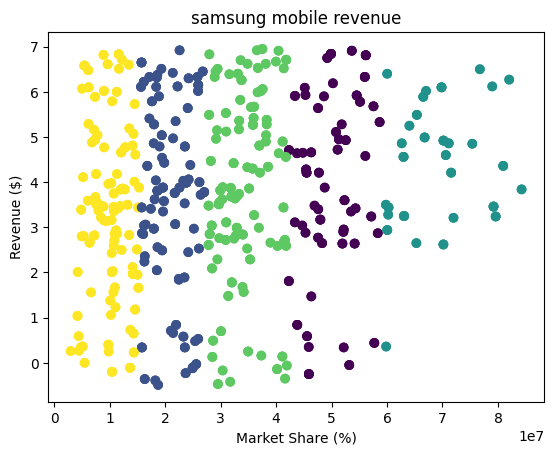

In [ ]:
plt.scatter(aa['Revenue ($)'],aa['Market Share (%)'],c=aa['cluster'])
plt.title('samsung mobile revenue')
plt.xlabel('Market Share (%)')
plt.ylabel('Revenue ($)')
plt.show()